In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris_data = datasets.load_iris()

In [10]:
iris_x = iris_data.data.T[[0, 2]].T[:100]
iris_x = np.array(iris_x)

iris_y = iris_data.target[:100]
iris_y = np.array(iris_y)

In [11]:
def roheingabe(x, w):
    bias = w[0]
    return np.dot(x, w[1:]) + bias

def output(x, w):
    return np.where(roheingabe(x, w) >= 0.0, 1, 0)

def train(x, y, alpha, epochs):
    # alles mit 0 initialisieren basierend auf der Anzahl der Spalten
    w = np.zeros(1 + x.shape[1])
    loss = []

    for i in range(epochs):
        print(f'Epoch {i}/{epochs}')
        out = output(x, w)
        diff = y - out

        # alle Gewichte aktualisieren (das 1. nicht, weil das ja das Bias-Neuron ist)
        w[1:] += alpha * x.T.dot(diff)
        w[0] += alpha * diff.sum()

        quadratic_error = (diff**2).sum() / 2.0
        print(f'Quadratic Error: {quadratic_error:.4f}')
        loss.append(quadratic_error)
    
    return w

w = train(iris_x, iris_y, 0.1, 10)

Epoch 0/10
Quadratic Error: 25.0000
Epoch 1/10
Quadratic Error: 25.0000
Epoch 2/10
Quadratic Error: 25.0000
Epoch 3/10
Quadratic Error: 25.0000
Epoch 4/10
Quadratic Error: 25.0000
Epoch 5/10
Quadratic Error: 23.5000
Epoch 6/10
Quadratic Error: 25.0000
Epoch 7/10
Quadratic Error: 0.0000
Epoch 8/10
Quadratic Error: 0.0000
Epoch 9/10
Quadratic Error: 0.0000


In [12]:
from sklearn import metrics
metrics.confusion_matrix(iris_y, output(iris_x, w))

array([[50,  0],
       [ 0, 50]])

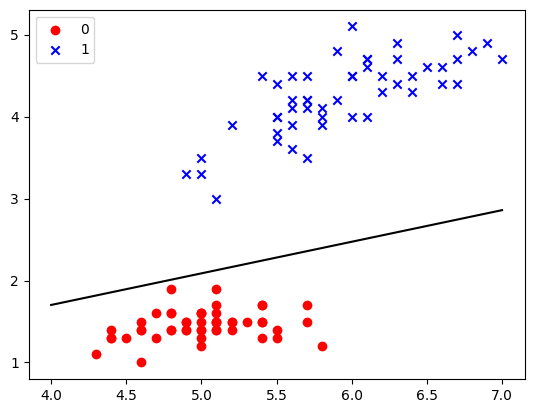

In [13]:
# .T = transponiert
# :50 = 0-49
# 50: = 50-99
plt.scatter(iris_x.T[0, :50],iris_x.T[1, :50], color='red', marker='o', label='0')
plt.scatter(iris_x.T[0, 50:],iris_x.T[1, 50:], color='blue', marker='x', label='1')
plt.legend(loc='upper left')

x1 = np.linspace(4, 7, 10)
# bias is w[0]
x2 = -(w[1]*x1 + w[0])/w[2]
plt.plot(x1, x2, color='black')